In [3]:
import os
import warnings
import pandas as pd
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.filterwarnings(action="ignore", message="credentials were not supplied. open data access only")

In [6]:
SBL = StatsBombLoader()

In [7]:
df_events = SBL.events(game_id=7548)

In [8]:
df_players = SBL.players(game_id=7548)

In [9]:
df_players

,game_id,team_id,player_id,player_name,nickname,jersey_number,is_starter,starting_position_id,starting_position_name,minutes_played
0,7548,781,3054,Fernando Luiz Rosa,Fernandinho,17,False,0,Substitute,6
1,7548,781,3202,Gabriel Fernando de Jesus,Gabriel Jesus,9,True,23,Center Forward,93
2,7548,781,3295,Thiago Emiliano da Silva,Thiago Silva,2,True,3,Right Center Back,99
3,7548,781,3472,Willian Borges da Silva,Willian,19,True,17,Right Wing,45
4,7548,781,3501,Philippe Coutinho Correia,Philippe Coutinho,11,True,15,Left Center Midfield,99
5,7548,781,3535,Roberto Firmino Barbosa de Oliveira,Roberto Firmino,20,False,0,Substitute,31
6,7548,781,4320,Neymar da Silva Santos Junior,Neymar,10,True,21,Left Wing,99
7,7548,781,5539,Carlos Henrique Casimiro,Casemiro,5,True,10,Center Defensive Midfield,99
8,7548,781,5542,José Paulo Bezzera Maciel Júnior,Paulinho,15,True,13,Right Center Midfield,68
9,7548,781,5547,Alisson Ramsés Becker,Alisson,1,True,1,Goalkeeper,99


In [11]:
df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id=781)

In [12]:
df_actions = (
  spadl
  .add_names(df_actions)  # add actiontype and result names
  .merge(SBL.teams(game_id=7548), how='left')  # add team names
  .merge(SBL.players(game_id=7548), how='left')  # add player names
)

In [13]:
df_actions

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id,type_name,result_name,bodypart_name,team_name,player_name,nickname,jersey_number,is_starter,starting_position_id,starting_position_name,minutes_played
0,7548,c6758a85-e41e-430c-85f0-8646bfc26f31,1,1.0,795,5586.0,52.058824,34.430380,87.352941,33.569620,0,1,5,0,pass,success,foot_right,Costa Rica,Marcos Danilo Ureña Porras,Marcos Ureña,21,True,23,Center Forward,54
1,7548,1df25d7b-81eb-42c7-9508-5ac982da84ee,1,3.0,795,5597.0,87.352941,33.569620,84.705882,38.734177,21,1,0,1,dribble,success,foot,Costa Rica,Keylor Navas Gamboa,Keylor Navas,1,True,1,Goalkeeper,99
2,7548,dc30de29-8e5a-43e3-9a14-176fe177b45f,1,5.0,795,5597.0,84.705882,38.734177,27.352941,51.645570,0,0,5,2,pass,fail,foot_right,Costa Rica,Keylor Navas Gamboa,Keylor Navas,1,True,1,Goalkeeper,99
3,7548,90e2af19-d896-43dd-bbfb-ce321b77a6f2,1,8.0,781,5539.0,29.117647,49.924051,30.000000,49.924051,0,0,0,3,pass,fail,foot,Brazil,Carlos Henrique Casimiro,Casemiro,5,True,10,Center Defensive Midfield,99
4,7548,NaN,1,9.0,781,5542.0,30.000000,49.924051,30.882353,45.620253,21,1,0,4,dribble,success,foot,Brazil,José Paulo Bezzera Maciel Júnior,Paulinho,15,True,13,Right Center Midfield,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,7548,7ea9dfb9-adb5-488a-93fc-292952213f56,2,3104.0,781,5837.0,92.647059,18.936709,98.823529,21.518987,21,1,0,2193,dribble,success,foot,Brazil,Douglas Costa de Souza,Douglas Costa,7,False,0,Substitute,54
2194,7548,ec84fb26-2a20-4a90-9ef3-6f8aad28781b,2,3105.0,781,5837.0,98.823529,21.518987,101.470588,32.708861,1,1,5,2194,cross,success,foot_right,Brazil,Douglas Costa de Souza,Douglas Costa,7,False,0,Substitute,54
2195,7548,b7728f99-998f-46c8-8ea3-0595ba54eeb2,2,3105.0,781,4320.0,100.588235,32.708861,105.000000,37.356962,11,1,4,2195,shot,success,foot_left,Brazil,Neymar da Silva Santos Junior,Neymar,10,True,21,Left Wing,99
2196,7548,88f63c61-0a9d-431d-b67d-ea89d497e7d1,2,3176.0,795,5595.0,52.941176,33.569620,81.176471,36.151899,0,1,5,2196,pass,success,foot_right,Costa Rica,Johan Alberto Venegas Ulloa,Johan Venegas,11,True,17,Right Wing,99


In [20]:
df_actions.groupby('type_name').size()

type_name
bad_touch            26
clearance            37
corner_crossed        9
corner_short          2
cross                22
dribble             962
foul                 28
freekick_crossed     12
freekick_short       10
goalkick              5
interception         12
keeper_claim          2
keeper_punch          1
keeper_save           7
pass                944
shot                 27
tackle               37
take_on              28
throw_in             27
dtype: int64

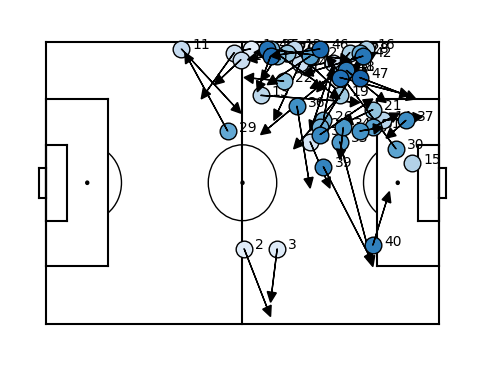

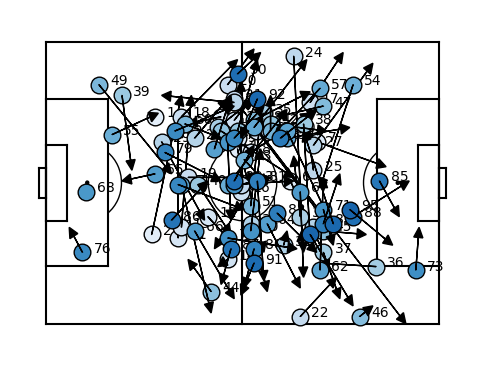

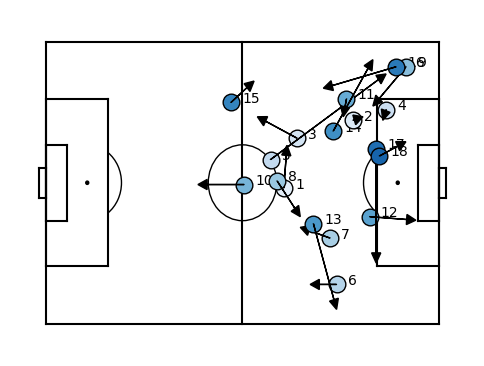

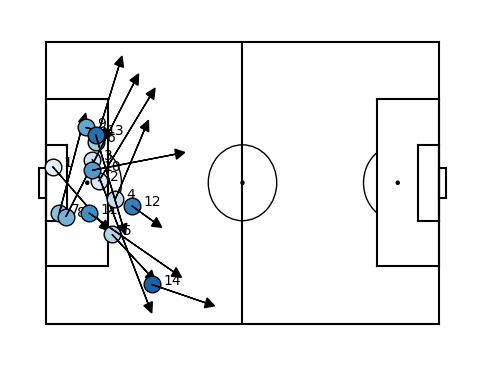

In [41]:
import matplotsoccer

def showPassPlot(player_id):
    action_type_name = 'pass'
    a = df_actions[(df_actions['type_name'] == action_type_name) & (df_actions['player_id'] == player_id)]

    # ref: https://github.com/TomDecroos/matplotsoccer/blob/fac4c5554d873f57a8997d735220da653bb3593b/matplotsoccer/fns.py#L285
    ax = matplotsoccer.actions(
        location=a[["start_x", "start_y", "end_x", "end_y"]],
        action_type=a.type_name,
        zoom=False,
        figsize=6,
        show_legend=False
    )
    
showPassPlot(4320) # ネイマール
showPassPlot(5539) # カゼミロ
showPassPlot(3202) # ジェズス
showPassPlot(5547) # アリソン